# Task 1

In [43]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [44]:
# Importing the dataset
dataset_1 = pd.read_csv('2020_US_weekly_symptoms_dataset.csv')  #Search Trends dataset

dataset_2 = pd.read_csv('aggregated_cc_by.csv', dtype={"test_units": "object"})  #hospitalization cases dataset
dataset_2 = dataset_2.iloc[78164:90022]  #Loading rows for USA only and rows that don't have all missing values

weather_data = pd.read_csv('temperature_dataframe_editUS.csv') #contains weather data (our additional feature)
weather_data = weather_data.iloc[12476:15836, 1:] #only getting data for the USA

#Cleaning the datasets

dataset_1 = dataset_1.dropna(axis='columns', how='all', thresh=255)  #removes columns with all NaN values
dataset_1 = dataset_1.dropna(axis='rows', how='all', thresh=20)  #removes rows with all NaN values

dataset_2 = dataset_2.dropna(axis='columns', how='all')  #removes columns with all NaN values
dataset_2 = dataset_2.dropna(axis='rows', how='all')  #removes rows with all NaN values


In [45]:
#Match time resolution

#changing date formt to datetime64
dataset_1['date'] = pd.to_datetime(dataset_1['date'])
dataset_2['date'] = pd.to_datetime(dataset_2['date'])
weather_data['date'] = pd.to_datetime(weather_data['date'])

dataset_2 = dataset_2.groupby(['open_covid_region_code', pd.Grouper(key='date', freq='W-MON')])['hospitalized_new'].sum().reset_index().sort_values('date')
weather_data = weather_data.groupby(['sub_region_1', pd.Grouper(key='date', freq='W-MON')])['temp'].mean().reset_index().sort_values('date')


# dataset_3 = pd.merge(dataset_1, weather_data[['date', 'sub_region_1', 'temp']], on=['date', 'sub_region_1'])
dataset_3 = pd.merge(dataset_1, dataset_2[['date', 'open_covid_region_code', 'hospitalized_new']], on=['date', "open_covid_region_code"])

dataset_3 = dataset_3.set_index(dataset_3['date'])
dataset_3 = dataset_3.sort_index()

# Task 2

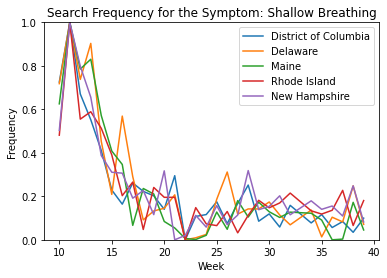

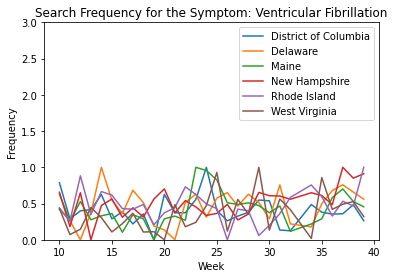

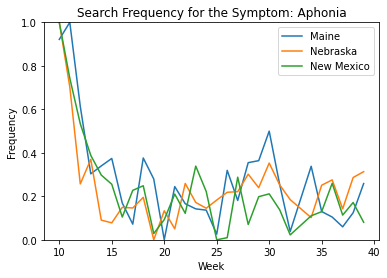

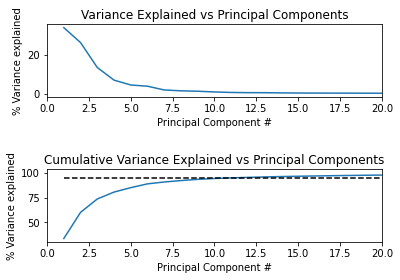

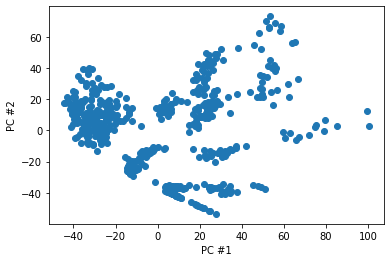

In [46]:
### Task 2.1
# Importing the dataset
dataset_1 = pd.read_csv('2020_US_weekly_symptoms_dataset.csv')  #Search Trends dataset
dataset_2 = pd.read_csv('aggregated_cc_by.csv', dtype={"test_units": "object"})  #hospitalization cases dataset
dataset_2 = dataset_2.iloc[78164:90022]  #Loading rows for USA only and rows that don't have all missing values

#Cleaning the datasets

dataset_1 = dataset_1.dropna(axis='columns', how='all')  #removes columns with all NaN values
dataset_1 = dataset_1.dropna(axis='rows', how='all')  #removes rows with all NaN values

dataset_2 = dataset_2.dropna(axis='columns', how='all')  #removes columns with all NaN values
dataset_2 = dataset_2.dropna(axis='rows', how='all')  #removes rows with all NaN values

#Match time resolution

#chnaging date formt to datetime64
dataset_1['date'] = pd.to_datetime(dataset_1['date'])
dataset_2['date'] = pd.to_datetime(dataset_2['date'])
dataset_2 = dataset_2.groupby(['open_covid_region_code', pd.Grouper(key='date', freq='W-MON')])['hospitalized_new'].sum().reset_index().sort_values('date')

#Merge the two datasets

#merging on multiple columns
dataset_3 = pd.merge(dataset_1, dataset_2[['date', 'open_covid_region_code', 'hospitalized_new']], on=['date', "open_covid_region_code"])

#First we get the top 5 symptoms 
validCounts = dataset_3.count()
validCounts = validCounts.drop(['open_covid_region_code', 'country_region', 'sub_region_1', 'sub_region_1_code', 'country_region_code', 'date', 'hospitalized_new'])
validCounts = validCounts.sort_values(ascending = False)
validCounts = validCounts.iloc[0:5]
topSymptoms = validCounts.index.tolist()

#Store a list of strings the top5 symptoms and collumns we want to keep
noDrop = ['date', 'sub_region_1'] + topSymptoms

#Now that we have the top symptoms as a list we can plot them for the visualization
#We start by taking dataset_3 and dropping all collumns except location,date, symptoms
simplifiedSet = dataset_3[noDrop]

#We also drop any states which have nan values inside all their collumns, we want states with data for the full period we're looking at
statesToDrop = ['Alaska', 'Wyoming', 'Hawaii', 'Idaho', 'North Dakota', 'South Dakota']
for x in range(0, len(statesToDrop)):
    simplifiedSet = simplifiedSet[simplifiedSet.sub_region_1 != statesToDrop[x]]
    
#We now have a list where every state has at least one complete collumn with no Nan values

#Lets plot the search frequency for shallowbreathing first. We will do states DC, Delaware, Maine, West Virginia, RHode Island, New Hampshire
#Weeks will be the same for all so
weekX = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39]
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

def normalizer(regionName, Sym):
    dc = simplifiedSet[simplifiedSet.sub_region_1 == regionName]
    dc = dc[[Sym]]
    df = pd.DataFrame(dc)
    # Create x, where x the 'scores' column's values as floats
    x = df[[Sym]].values.astype(float)
    # Create an object to transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(x)
    # Run the normalizer on the dataframe
    df_normalized = pd.DataFrame(x_scaled)
    # View the dataframe
    return df_normalized.values.tolist()
    
#Now we need to pull out the relevant values for the symptom/weeks we want
shallowDCY = simplifiedSet[simplifiedSet.sub_region_1 == 'District of Columbia']
shallowDCY = shallowDCY[['symptom:Shallow breathing']]
shallowDCY = shallowDCY.values.tolist()    
shallowDCY = normalizer('District of Columbia', 'symptom:Shallow breathing')

shallowDelawareY = simplifiedSet[simplifiedSet.sub_region_1 == 'Delaware']
shallowDelawareY = shallowDelawareY[['symptom:Shallow breathing']]
shallowDelawareY = shallowDelawareY.values.tolist()
shallowDelawareY = normalizer('Delaware', 'symptom:Shallow breathing')


shallowMaineY = simplifiedSet[simplifiedSet.sub_region_1 == 'Maine']
shallowMaineY = shallowMaineY[['symptom:Shallow breathing']]
shallowMaineY = shallowMaineY.values.tolist()
shallowMaineY  = normalizer('Maine', 'symptom:Shallow breathing')

shallowWestVirY = simplifiedSet[simplifiedSet.sub_region_1 == 'West Virginia']
shallowWestVirY = shallowWestVirY[['symptom:Shallow breathing']]
shallowWestVirY = shallowWestVirY.values.tolist()
shallowWestVirY = normalizer('West Virginia', 'symptom:Shallow breathing')

shallowRhodeY = simplifiedSet[simplifiedSet.sub_region_1 == 'Rhode Island']
shallowRhodeY = shallowRhodeY[['symptom:Shallow breathing']]
shallowRhodeY = shallowRhodeY[1::]
shallowRhodeY = shallowRhodeY.values.tolist()
shallowRhodeY = normalizer('Rhode Island', 'symptom:Shallow breathing')
shallowRhodeY = shallowRhodeY[1::]


shallowHampshireY = simplifiedSet[simplifiedSet.sub_region_1 == 'New Hampshire']
shallowHampshireY = shallowHampshireY[['symptom:Shallow breathing']]
shallowHampshireY = shallowHampshireY.values.tolist()
shallowHampshireY  = normalizer('New Hampshire', 'symptom:Shallow breathing')
#Now we plot SHALLOw BREATHING
plt.plot(weekX, shallowDCY, label = 'District of Columbia')
plt.plot(weekX, shallowDelawareY, label = 'Delaware')
plt.plot(weekX, shallowMaineY, label = 'Maine')
plt.plot(weekX, shallowRhodeY, label = 'Rhode Island')
plt.plot(weekX, shallowHampshireY, label = 'New Hampshire')
plt.xlabel('Week')
plt.ylabel('Frequency')
plt.ylim(0,1)
plt.title('Search Frequency for the Symptom: Shallow Breathing')
plt.legend()
plt.show()

#Now lets plot the search frequency for Ventricular fibrillation. We will plot the following states: DC, Delaware, Maine, New Hampshire, RhodeIsland, West Virginia
ventGraph = simplifiedSet[['sub_region_1','symptom:Ventricular fibrillation']]

ventDCY = ventGraph[ventGraph.sub_region_1 == 'District of Columbia']
ventDCY = ventDCY[['symptom:Ventricular fibrillation']]
ventDCY = ventDCY.values.tolist()
ventDCY = normalizer('District of Columbia', 'symptom:Ventricular fibrillation')

ventDelY = ventGraph[ventGraph.sub_region_1 == 'Delaware']
ventDelY= ventDelY[['symptom:Ventricular fibrillation']]
ventDelY = ventDelY.values.tolist()
ventDelY = normalizer('Delaware', 'symptom:Ventricular fibrillation')

ventMaineY = ventGraph[ventGraph.sub_region_1 == 'Maine']
ventMaineY = ventMaineY[['symptom:Ventricular fibrillation']]
ventMaineY = ventMaineY.values.tolist()
ventMaineY = normalizer('Maine', 'symptom:Ventricular fibrillation')

ventNHY = ventGraph[ventGraph.sub_region_1 == 'New Hampshire']
ventNHY = ventNHY[['symptom:Ventricular fibrillation']]
ventNHY = ventNHY.values.tolist()
ventNHY = normalizer('New Hampshire', 'symptom:Ventricular fibrillation')

ventRIY = ventGraph[ventGraph.sub_region_1 == 'Rhode Island']
ventRIY = ventRIY[['symptom:Ventricular fibrillation']]
ventRIY = ventRIY[1::]
ventRIY = ventRIY.values.tolist()
ventRIY = normalizer('Rhode Island', 'symptom:Ventricular fibrillation')
ventRIY = ventRIY[1::]

ventWVY = ventGraph[ventGraph.sub_region_1 == 'West Virginia']
ventWVY = ventWVY[['symptom:Ventricular fibrillation']]
ventWVY = ventWVY.values.tolist()
ventWVY = normalizer('West Virginia', 'symptom:Ventricular fibrillation')

#Plot the Ventricular Fibrillation graph
plt.plot(weekX, ventDCY, label = 'District of Columbia')
plt.plot(weekX, ventDelY, label = 'Delaware')
plt.plot(weekX, ventMaineY, label = 'Maine')
plt.plot(weekX, ventNHY, label = 'New Hampshire')
plt.plot(weekX, ventRIY, label = 'Rhode Island')
plt.plot(weekX, ventWVY, label = 'West Virginia')
plt.xlabel('Week')
plt.ylabel('Frequency')
plt.ylim(0,3)
plt.title('Search Frequency for the Symptom: Ventricular Fibrillation')
plt.legend()
plt.show()

#Now lets do the same for the symptom aphonia. We will plot the following states: Maine, Nebraska, New Mexico
aphoniaGraph = simplifiedSet[['sub_region_1','symptom:Aphonia']]

aphoniaMaineY = aphoniaGraph[aphoniaGraph.sub_region_1 == 'Maine']
aphoniaMaineY = aphoniaMaineY[['symptom:Aphonia']]
aphoniaMaineY = aphoniaMaineY.values.tolist()
aphoniaMaineY= normalizer('Maine', 'symptom:Aphonia')

aphoniaNebraskaY = aphoniaGraph[aphoniaGraph.sub_region_1 == 'Nebraska']
aphoniaNebraskaY = aphoniaNebraskaY[['symptom:Aphonia']]
aphoniaNebraskaY = aphoniaNebraskaY.values.tolist()
aphoniaNebraskaY = normalizer('Nebraska', 'symptom:Aphonia')

aphoniaNewMY = aphoniaGraph[aphoniaGraph.sub_region_1 == 'New Mexico']
aphoniaNewMY = aphoniaNewMY[['symptom:Aphonia']]
aphoniaNewMY = aphoniaNewMY.values.tolist()
aphoniaNewMY = normalizer('New Mexico', 'symptom:Aphonia')
#Plot now - APHONIA
plt.plot(weekX, aphoniaMaineY, label = 'Maine')
plt.plot(weekX, aphoniaNebraskaY, label = 'Nebraska')
plt.plot(weekX, aphoniaNewMY, label = 'New Mexico')
plt.xlabel('Week')
plt.ylabel('Frequency')
plt.ylim(0,1)
plt.title('Search Frequency for the Symptom: Aphonia')
plt.legend()
plt.show()

#Tasks 2.2 PCA
#For task 2.2 we use the search trends dataset(i.e. dataset1)

#First we will remove everything except the features
dataset_4 = dataset_1.drop(['open_covid_region_code', 'country_region', 'sub_region_1', 'sub_region_1_code', 'country_region_code', 'date'], axis = 'columns')

#Drop collumns with less than 250 values
dataset_4.dropna(axis = 1, inplace= True, how = all, thresh = 250)

#Put 0 for all nan values
dataset_4.fillna(0, inplace = True)

#Lets first plot the variance vs PC's to see how many PC's we need in order to retain ~95% of the data
#Please note that this code was adapted from the sklean coding tutorial 
from sklearn.decomposition import PCA

pca2 = PCA()
pca2.fit(dataset_4)
num_pc_components = len(pca2.explained_variance_ratio_)
plt.subplot(2,1,1)
plt.plot(np.linspace(1,num_pc_components,num_pc_components),100*pca2.explained_variance_ratio_)
plt.xlabel("Principal Component #")
plt.xlim(0,20)
plt.ylabel("% Variance explained")
plt.title("Variance Explained vs Principal Components")

plt.subplot(2,1,2)
plt.plot(np.linspace(1,num_pc_components,num_pc_components),100*np.cumsum(pca2.explained_variance_ratio_))
plt.plot(np.linspace(1,num_pc_components,num_pc_components),95*np.ones((num_pc_components,)),'k--')
plt.xlabel("Principal Component #")
plt.xlim(0,20)
plt.ylabel("% Variance explained")
plt.title("Cumulative Variance Explained vs Principal Components")
plt.subplots_adjust(wspace = 0.5, hspace = 1.0)
plt.show()


#Im going to choose to keep 10 PC's in order to retain ~95% of the data
pca = PCA(n_components=10)
pca.fit(dataset_4)
reduced_dataset_4 = pca.transform(dataset_4)

plt.scatter(reduced_dataset_4[:,0], reduced_dataset_4[:,1])
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.show()

In [47]:
#K-Means Clustering for raw and PCA reduced data

#Raw Data

# Importing the dataset
dataset_1 = pd.read_csv('2020_US_weekly_symptoms_dataset.csv')  #Search Trends dataset

#Cleaning the datasets

dataset_1 = dataset_1.drop(['open_covid_region_code', 'country_region', 'sub_region_1', 'sub_region_1_code', 'country_region_code', 'date'], axis = 'columns')
dataset_1.dropna(axis = 1, inplace= True, how = all, thresh = 250)
dataset_1.fillna(0, inplace = True)

raw_data = dataset_1.iloc[:, :].values


In [48]:
#PCA reduced data

# Importing the dataset
dataset_1 = pd.read_csv('2020_US_weekly_symptoms_dataset.csv')  #Search Trends dataset

#First we will remove everything except the features
dataset_4 = dataset_1.drop(['open_covid_region_code', 'country_region', 'sub_region_1', 'sub_region_1_code', 'country_region_code', 'date'], axis = 'columns')

#Drop collumns with less than 250 values
dataset_4.dropna(axis = 1, inplace= True, how = all, thresh = 250)

#Put 0 for all nan values
dataset_4.fillna(0, inplace = True)

#We choose to keep 10 PC's in order to retain ~95% of the data
pca = PCA(n_components=10)
pca.fit(dataset_4)
pca_reduced_data = pca.transform(dataset_4)

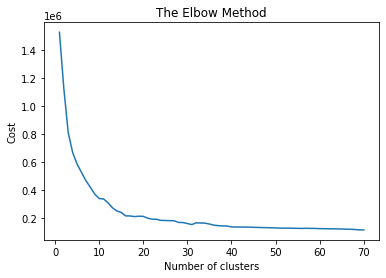

In [49]:
from sklearn.cluster import KMeans

#Using elbow method to detremine value of k clusters for the raw data

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

wcss = []
for i in range(1, 71):
    kmeans = KMeans(n_clusters = i, **kmeans_kwargs)
    kmeans.fit(raw_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 71), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

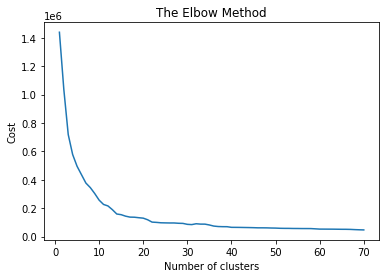

In [50]:
#Using elbow method to detremine value of k clusters for the PCA reduce data

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

wcss = []
for i in range(1, 71):
    kmeans = KMeans(n_clusters = i, **kmeans_kwargs)
    kmeans.fit(pca_reduced_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 71), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

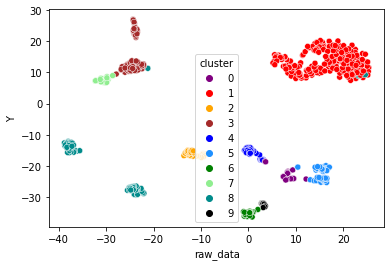

In [51]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

# Training the K-Means model on the raw dataset
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(raw_data)

#Reduce dimension of raw data to 2D array for visualizing 
tsne_obj= tsne.fit_transform(raw_data)

cluster_result = pd.DataFrame({'open_covid_region_code':dataset_1.iloc[:, 0].values, 'date':dataset_1.iloc[:, 5].values, 'cluster':y_kmeans})
tsne_df = pd.DataFrame({'raw_data':tsne_obj[:,0], 'Y':tsne_obj[:,1], 'cluster':y_kmeans})

#plot the clusters
sns.scatterplot(x="raw_data", y="Y", data=tsne_df, hue="cluster", palette=['purple','red','orange','brown','blue',
                        'dodgerblue','green','lightgreen','darkcyan', 'black'],
              legend='full');

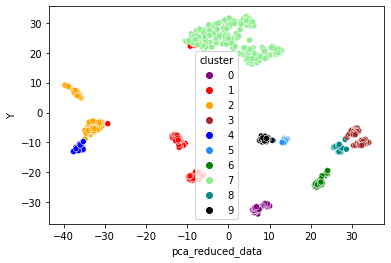

In [52]:
# Training the K-Means model on the PCA reduced dataset
kmeans = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(pca_reduced_data)

#Reduce dimension of PCA reduced data to 2D array for visualizing 
tsne_obj= tsne.fit_transform(pca_reduced_data)

cluster_result = pd.DataFrame({'open_covid_region_code':dataset_1.iloc[:, 0].values, 'date':dataset_1.iloc[:, 5].values, 'cluster':y_kmeans})
tsne_df = pd.DataFrame({'pca_reduced_data':tsne_obj[:,0], 'Y':tsne_obj[:,1], 'cluster':y_kmeans})

#plot the clusters
sns.scatterplot(x="pca_reduced_data", y="Y", data=tsne_df, hue="cluster", palette=['purple','red','orange','brown','blue',
                        'dodgerblue','green','lightgreen','darkcyan', 'black'],
              legend='full');

# Task 3

## K Nearest Neighbors

In [53]:
# Importing the dataset
dataset_1 = pd.read_csv('2020_US_weekly_symptoms_dataset.csv')  #Search Trends dataset

dataset_2 = pd.read_csv('aggregated_cc_by.csv', dtype={"test_units": "object"})  #hospitalization cases dataset
dataset_2 = dataset_2.iloc[78164:90022]  #Loading rows for USA only and rows that don't have all missing values

weather_data = pd.read_csv('temperature_dataframe_editUS.csv') #contains weather data (our additional feature)
weather_data = weather_data.iloc[12476:15836, 1:] #only getting data for the USA

#Cleaning the datasets

dataset_1 = dataset_1.dropna(axis='columns', how='all', thresh=255)  #removes columns with all NaN values
dataset_1 = dataset_1.dropna(axis='rows', how='all', thresh=20)  #removes rows with all NaN values

dataset_2 = dataset_2.dropna(axis='columns', how='all')  #removes columns with all NaN values
dataset_2 = dataset_2.dropna(axis='rows', how='all')  #removes rows with all NaN values

#Match time resolution

#changing date formt to datetime64
dataset_1['date'] = pd.to_datetime(dataset_1['date'])
dataset_2['date'] = pd.to_datetime(dataset_2['date'])
weather_data['date'] = pd.to_datetime(weather_data['date'])

dataset_2 = dataset_2.groupby(['open_covid_region_code', pd.Grouper(key='date', freq='W-MON')])['hospitalized_new'].sum().reset_index().sort_values('date')
weather_data = weather_data.groupby(['sub_region_1', pd.Grouper(key='date', freq='W-MON')])['temp'].mean().reset_index().sort_values('date')


# dataset_3 = pd.merge(dataset_1, weather_data[['date', 'sub_region_1', 'temp']], on=['date', 'sub_region_1'])
dataset_3 = pd.merge(dataset_1, dataset_2[['date', 'open_covid_region_code', 'hospitalized_new']], on=['date', "open_covid_region_code"])

dataset_3 = dataset_3.set_index(dataset_3['date'])
dataset_3 = dataset_3.sort_index()

# convert dataframe into numpy array for calculations
X = dataset_3.iloc[:, 4:-1].values  #get all the columns except the last one
y = dataset_3.iloc[:, -1].values  #get just the last column

# One Hot Encoding the "open_covid_region_code" & "date" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


# Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X[:, :])
X[:, :] = imputer.transform(X[:, :])

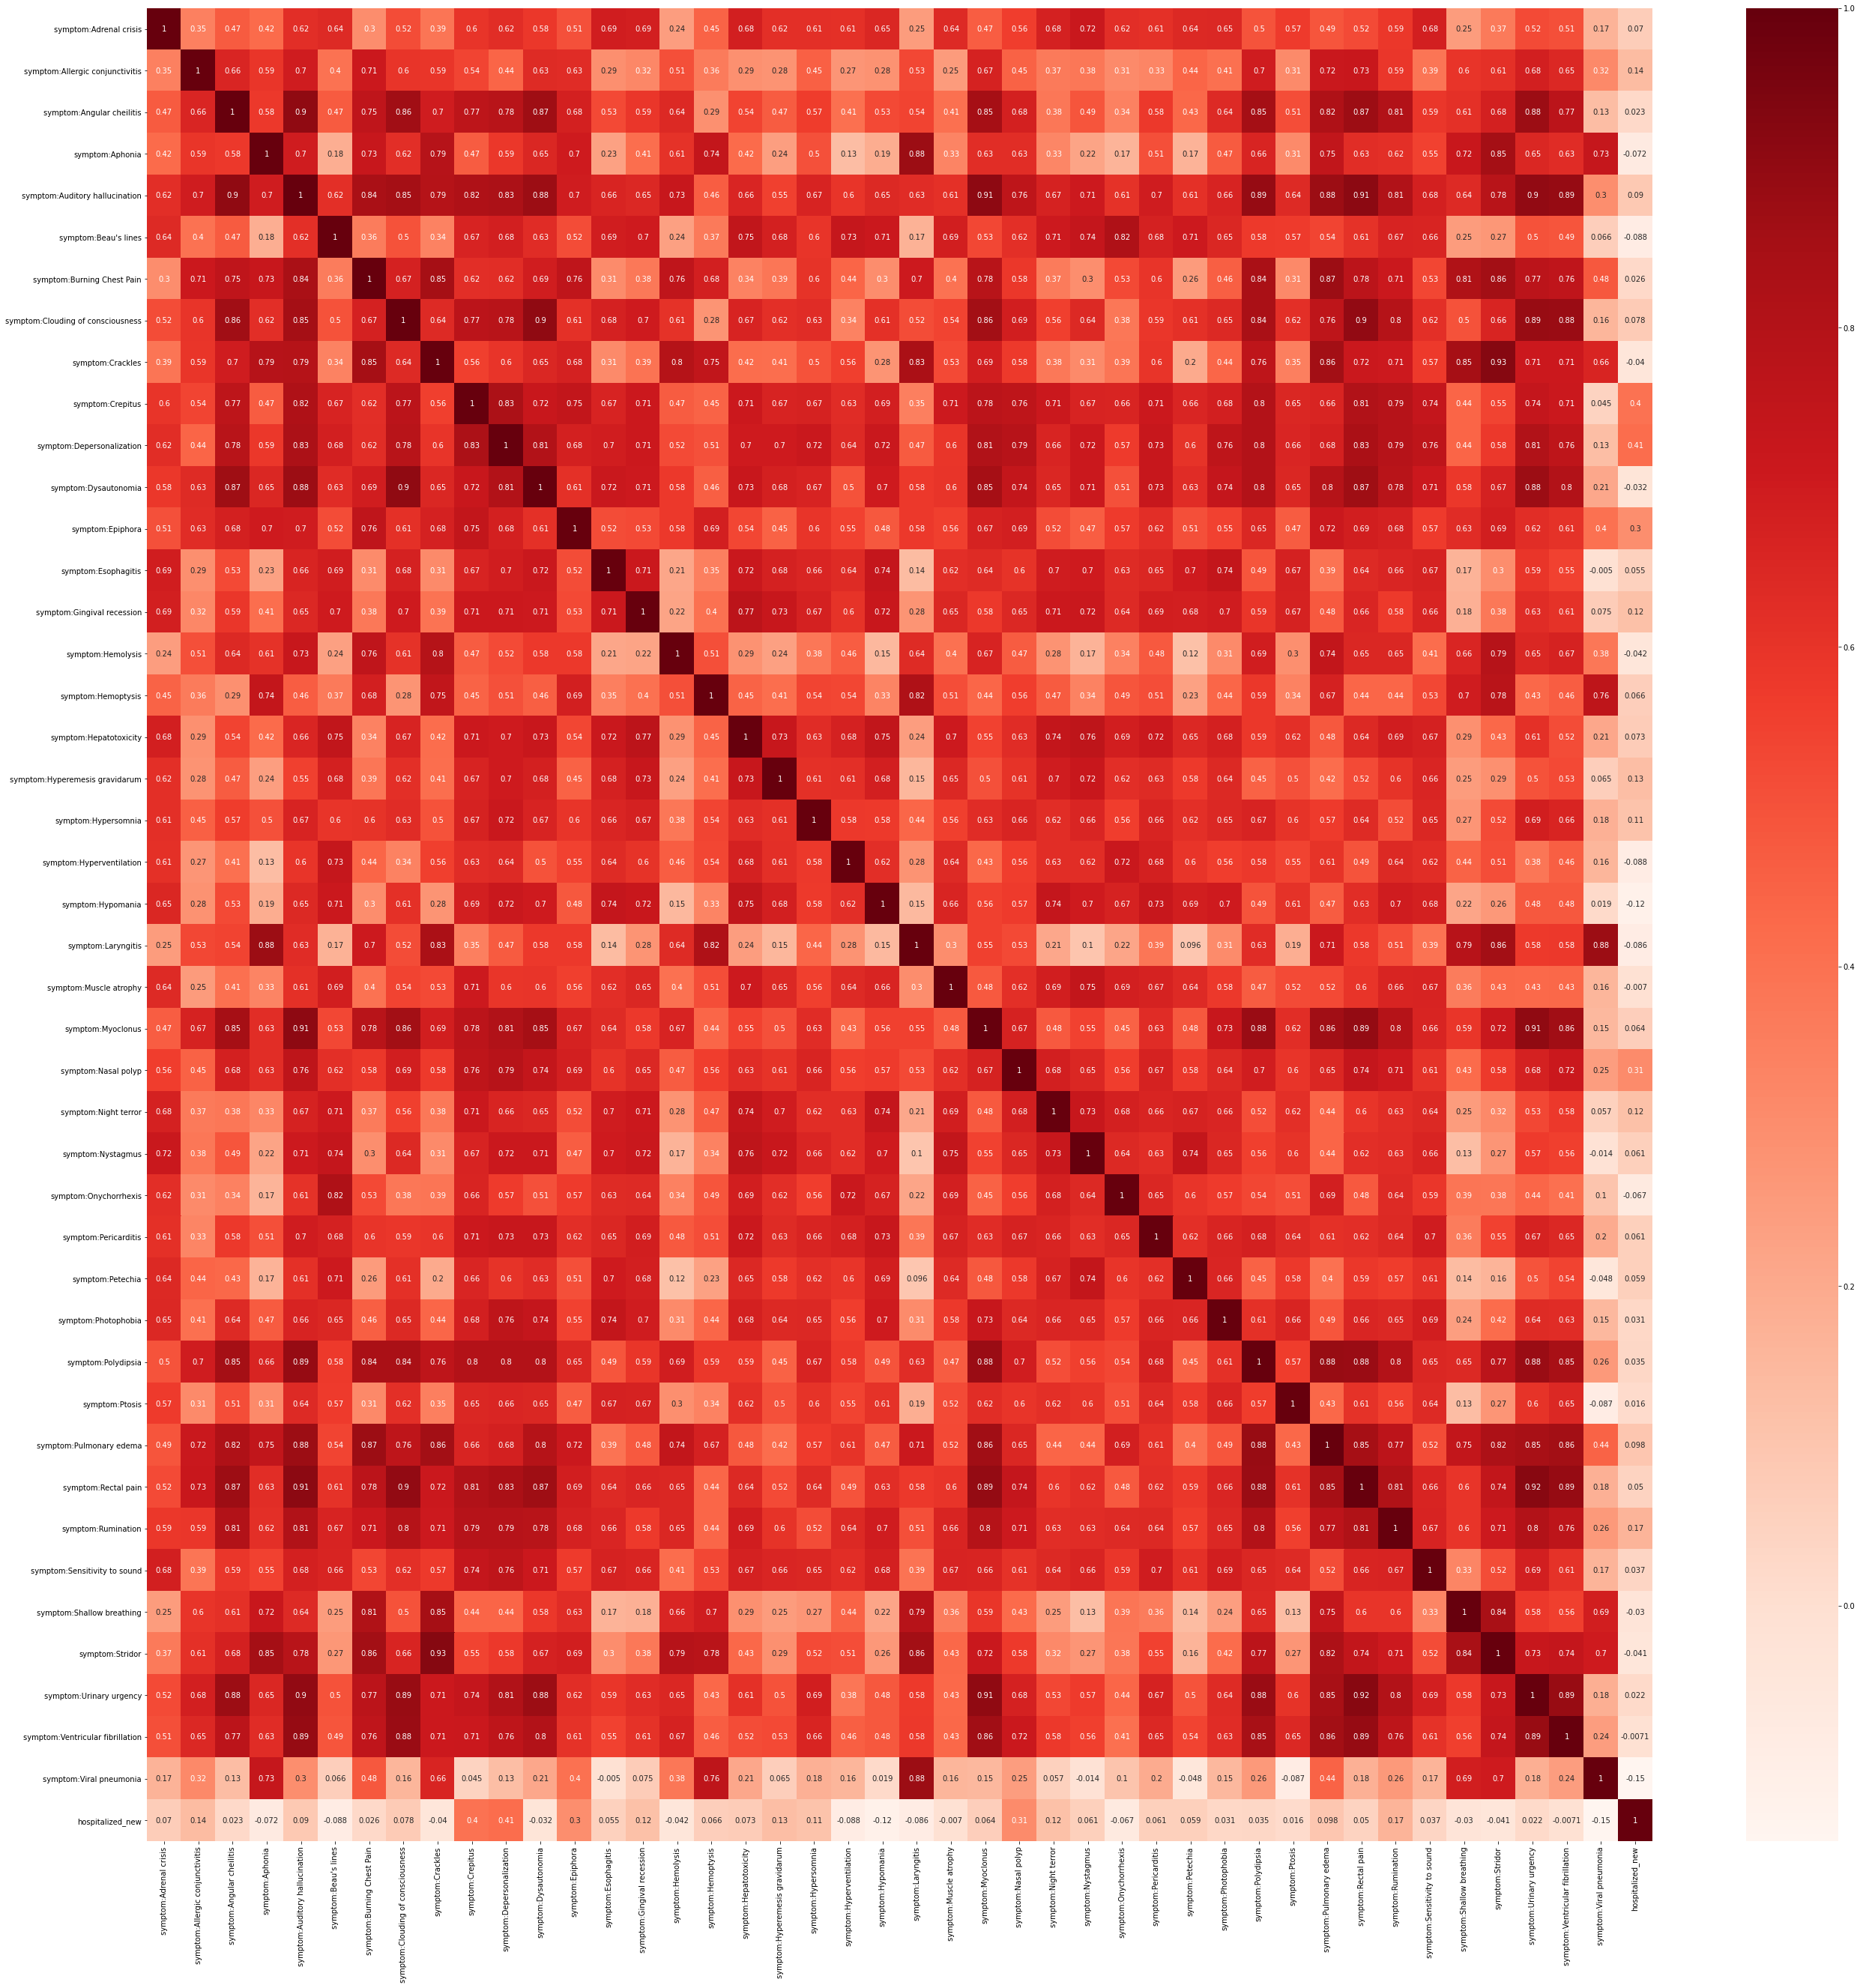

symptom:Allergic conjunctivitis    0.137456
symptom:Crepitus                   0.397839
symptom:Depersonalization          0.413924
symptom:Epiphora                   0.297734
symptom:Gingival recession         0.117662
symptom:Hyperemesis gravidarum     0.126766
symptom:Hypersomnia                0.108848
symptom:Hypomania                  0.116910
symptom:Nasal polyp                0.307346
symptom:Night terror               0.120250
symptom:Rumination                 0.165863
symptom:Viral pneumonia            0.147416
hospitalized_new                   1.000000
Name: hospitalized_new, dtype: float64


In [54]:
#Using Pearson Correlation
plt.figure(figsize=(45,45))
cor = dataset_3.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor["hospitalized_new"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
print(relevant_features)

In [55]:
# Splitting the dataset into the Training set and Test set based on region (strategy #1)
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y,train_size = 0.8, test_size = 0.2, random_state = 0, shuffle = True)


In [56]:
# Split the data at index 270 as that will contain all the data till 2020-08-10 for our training set (startagey #2)
X_train_2 = X[:270, :]
y_train_2 = y[:270]

X_test_2 = X[270:, :]
y_test_2 = y[270:]

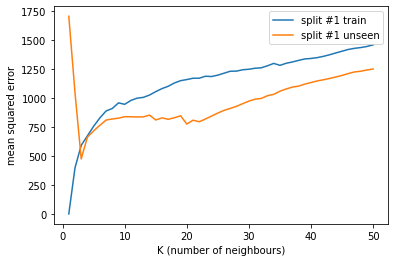

In [57]:
from sklearn.neighbors import KNeighborsRegressor

#define a function for the MSE loss
loss = lambda y, yh: np.mean((y-yh)**2)

# Plot the mean square error for different K values stored in K_list for split based on region (strategy #1)
K_list = range(1,51)
err_train_1, err_test_1 = [], []
for i, K in enumerate(K_list):
    knn_1 = KNeighborsRegressor(n_neighbors=K, metric = 'minkowski', p = 2)
    knn_1 = knn_1.fit(X_train_1, y_train_1)
    err_train_1.append(loss(knn_1.predict(X_train_1), y_train_1))
    err_test_1.append(loss(knn_1.predict(X_test_1), y_test_1))

plt.plot(K_list, err_train_1, '-', label='split #1 train')
plt.plot(K_list, err_test_1, '-', label='split #1 unseen')

plt.legend()
plt.xlabel('K (number of neighbours)')
plt.ylabel('mean squared error')
plt.show()

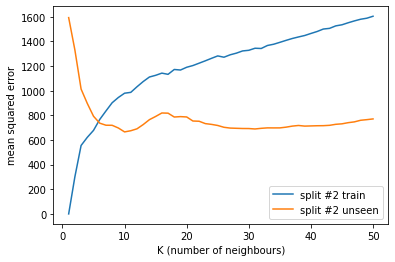

In [58]:
#define a function for the MSE loss
loss = lambda y, yh: np.mean((y-yh)**2)

# Plot the mean square error for different K values stored in K_list for split based on time (strategy #2)
K_list = range(1,51)
err_train_2, err_test_2 = [], []
for i, K in enumerate(K_list):
    knn_2 = KNeighborsRegressor(n_neighbors=K, metric = 'minkowski', p = 2)
    knn_2 = knn_2.fit(X_train_2, y_train_2)
    err_train_2.append(loss(knn_2.predict(X_train_2), y_train_2))
    err_test_2.append(loss(knn_2.predict(X_test_2), y_test_2))

plt.plot(K_list, err_train_2, '-', label='split #2 train')
plt.plot(K_list, err_test_2, '-', label='split #2 unseen')
plt.legend()
plt.xlabel('K (number of neighbours)')
plt.ylabel('mean squared error')
plt.show()

Length of list 40
Max of list 0.31819549558477855


Text(0, 0.5, 'Cross-validated accuracy')

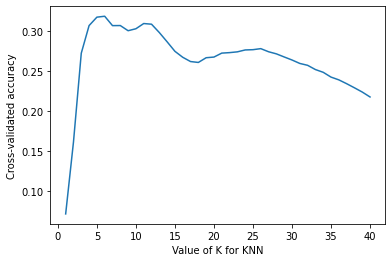

In [59]:
# search for an optimal value of K for KNN using cross validation on data split based on region

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# range of k we want to try
k_range = range(1, 41)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsRegressor(n_neighbors=k, metric = 'minkowski', p = 2)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=cv)
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

# plot how accuracy changes as we vary k


# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [60]:
#training the KNN model on the training data
knn_1 = KNeighborsRegressor(n_neighbors = 8 , metric = 'minkowski', p = 2) #used to train data split using strategy #1
knn_2 = KNeighborsRegressor(n_neighbors = 8, metric = 'minkowski', p = 2) #used to train data split based on strategy #2
knn_1.fit(X_train_1, y_train_1)
knn_2.fit(X_train_2, y_train_2)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

In [61]:
#predicting
from sklearn import metrics
y_pred_1_test = knn_1.predict(X_test_1)
y_pred_1_train = knn_1.predict(X_train_1)
y_pred_2_test = knn_2.predict(X_test_2)
y_pred_2_train = knn_2.predict(X_train_2)


In [62]:
#Print accuracy of knn_1 (split based on region)

print('K value: 8')
print('')

print('Test Data KNN Strategy #1 Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, y_pred_1_test))
print('Test Data KNN Strategy #1 Mean Squared Error:', metrics.mean_squared_error(y_test_1, y_pred_1_test))
print('Test Data KNN Strategy #1 Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_1_test)))

print('')

print('Train Data KNN Strategy #1 Mean Absolute Error:', metrics.mean_absolute_error(y_train_1, y_pred_1_train))
print('Train Data KNN Train Strategy #1 Mean Squared Error:', metrics.mean_squared_error(y_train_1, y_pred_1_train))
print('Train Data KNN Train Strategy #1 Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_1_train)))

#Print accuracy of knn_2 (split based on time)

print('')
print('K value: 8')
print('')

print('Test Data KNN Strategy #2 Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, y_pred_2_test))
print('Test Data KNN Strategy #2 Mean Squared Error:', metrics.mean_squared_error(y_test_2, y_pred_2_test))
print('Test Data KNN Strategy #2 Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2_test)))

print('')

print('Train Data KNN Strategy #2 Mean Absolute Error:', metrics.mean_absolute_error(y_train_2, y_pred_2_train))
print('Train Data KNN Strategy #2 Mean Squared Error:', metrics.mean_squared_error(y_train_2, y_pred_2_train))
print('Train Data KNN Strategy #2 Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_2, y_pred_2_train)))



K value: 8

Test Data KNN Strategy #1 Mean Absolute Error: 11.969202898550725
Test Data KNN Strategy #1 Mean Squared Error: 818.3091032608696
Test Data KNN Strategy #1 Root Mean Squared Error: 28.60610255279229

Train Data KNN Strategy #1 Mean Absolute Error: 13.373161764705882
Train Data KNN Train Strategy #1 Mean Squared Error: 908.3614430147059
Train Data KNN Train Strategy #1 Root Mean Squared Error: 30.13903520378026

K value: 8

Test Data KNN Strategy #2 Mean Absolute Error: 17.345070422535212
Test Data KNN Strategy #2 Mean Squared Error: 719.2147887323944
Test Data KNN Strategy #2 Root Mean Squared Error: 26.81818019054228

Train Data KNN Strategy #2 Mean Absolute Error: 12.574537037037038
Train Data KNN Strategy #2 Mean Squared Error: 902.2046875
Train Data KNN Strategy #2 Root Mean Squared Error: 30.036722316191558


## Decision Trees

Text(0, 0.5, 'mean squared error')

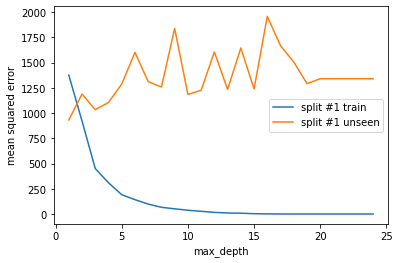

In [63]:
from sklearn.tree import DecisionTreeRegressor

#Max depth plot for Split strategy #1

#define a function for the MSE loss
loss = lambda y, yh: np.mean((y-yh)**2)

depth = range(1, 25)

err_train_1, err_test_1 = [], []


for d in depth:
    dtree_1 = DecisionTreeRegressor(random_state = 0, max_depth=d)
    dtree_1.fit(X_train_1, y_train_1)
    err_train_1.append(loss(dtree_1.predict(X_train_1), y_train_1))
    err_test_1.append(loss(dtree_1.predict(X_test_1), y_test_1))
    
plt.plot(depth, err_train_1, '-', label='split #1 train')
plt.plot(depth, err_test_1, '-', label='split #1 unseen')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('mean squared error')

Text(0, 0.5, 'mean squared error')

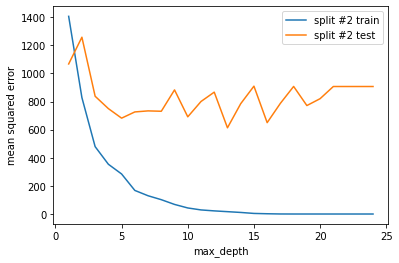

In [64]:
#Max depth plot for Split strategy #2

depth = range(1, 25)

err_train_2, err_test_2 = [], []


for d in depth:
    dtree_2 = DecisionTreeRegressor(random_state = 0, max_depth=d)
    dtree_2.fit(X_train_2, y_train_2)
    err_train_2.append(loss(dtree_2.predict(X_train_2), y_train_2))
    err_test_2.append(loss(dtree_2.predict(X_test_2), y_test_2))

plt.plot(depth, err_train_2, '-', label='split #2 train')
plt.plot(depth, err_test_2, '-', label='split #2 test')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('mean squared error')

In [65]:
dtree_1 = DecisionTreeRegressor(random_state = 0, max_depth=10) #used to train data split using strategy #1
dtree_2 = DecisionTreeRegressor(random_state = 0, max_depth=13) #used to train data split using strategy #2
dtree_1.fit(X_train_1, y_train_1)
dtree_2.fit(X_train_2, y_train_2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=13,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [66]:
# prediction
y_pred_1_test = dtree_1.predict(X_test_1)
y_pred_1_train = dtree_1.predict(X_train_1)
y_pred_2_test = dtree_2.predict(X_test_2)
y_pred_2_train = dtree_2.predict(X_train_2)

In [67]:
from sklearn import metrics

#Print accuracy of dtree_1 (split based on region)

print('max_depth dtree_1: ', dtree_1.get_depth())

print('')

print('Test Data Decision Tree Strategy #1 Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, y_pred_1_test))
print('Test Data Decision Tree Strategy #1 Mean Squared Error:', metrics.mean_squared_error(y_test_1, y_pred_1_test))
print('Test Data Decision Tree Strategy #1 Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_1_test)))

print('')

print('Train Data Decision Tree Strategy #1 Mean Absolute Error:', metrics.mean_absolute_error(y_train_1, y_pred_1_train))
print('Train Data Decision Tree Strategy #1 Mean Squared Error:', metrics.mean_squared_error(y_train_1, y_pred_1_train))
print('Train Data Decision Tree Strategy #1 Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_1_train)))

print('')

#Print accuracy of dtree_2 (split based on time)

print('max_depth dtree_2: ', dtree_2.get_depth())

print('')

print('Test Data Decision Tree Strategy #2 Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, y_pred_2_test))
print('Test Data Decision Tree Strategy #2 Mean Squared Error:', metrics.mean_squared_error(y_test_2, y_pred_2_test))
print('Test Data Decision Tree Strategy #2 Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2_test)))

print('')

print('Train Data Decision Tree Strategy #2 Mean Absolute Error:', metrics.mean_absolute_error(y_train_2, y_pred_2_train))
print('Train Data Decision Tree Strategy #2 Mean Squared Error:', metrics.mean_squared_error(y_train_2, y_pred_2_train))
print('Train Data Decision Tree Strategy #2 Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train_2, y_pred_2_train)))


max_depth dtree_1:  10

Test Data Decision Tree Strategy #1 Mean Absolute Error: 14.066942973121463
Test Data Decision Tree Strategy #1 Mean Squared Error: 1183.7464693014188
Test Data Decision Tree Strategy #1 Root Mean Squared Error: 34.40561682780035

Train Data Decision Tree Strategy #1 Mean Absolute Error: 2.758695252116305
Train Data Decision Tree Strategy #1 Mean Squared Error: 37.242425144514925
Train Data Decision Tree Strategy #1 Root Mean Squared Error: 6.102657219975158

max_depth dtree_2:  13

Test Data Decision Tree Strategy #2 Mean Absolute Error: 14.037081280332917
Test Data Decision Tree Strategy #2 Mean Squared Error: 613.3421543896491
Test Data Decision Tree Strategy #2 Root Mean Squared Error: 24.765745585175686

Train Data Decision Tree Strategy #2 Mean Absolute Error: 1.3285742060020276
Train Data Decision Tree Strategy #2 Mean Squared Error: 16.68901498423808
Train Data Decision Tree Strategy #2 Root Mean Squared Error: 4.085219086442988
